# Import Libraries

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import string
import seaborn as sns
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_auc_score, roc_curve, plot_roc_curve, precision_recall_curve, classification_report

# Load the Dataset

In [2]:
df = pd.read_csv("amazon.csv")
df.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [3]:
df1 = df.copy()

In [4]:
df1.isnull().sum()

reviewText    0
Positive      0
dtype: int64

# Text preprocessing

In [5]:
text_column = 'reviewText'
labels = 'Positive'

In [6]:
df1['Positive'].value_counts()

1    15233
0     4767
Name: Positive, dtype: int64

In [7]:
df1.reviewText[0]

'This is a one of the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff'

In [8]:
stopword = set(stopwords.words('english')) 
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Text preprocessing

In [10]:
def preprocess_text(text):
    remove_punc = [char for char in text if char not in string.punctuation]
    clean_words = ''.join(remove_punc) 
    
    text = ([word for word in clean_words.split() if word.lower() not in stopword]) 
    return text

In [11]:
df1[text_column] = df1[text_column].apply(preprocess_text)
df1[text_column]

0        [one, best, apps, acording, bunch, people, agr...
1        [pretty, good, version, game, free, LOTS, diff...
2        [really, cool, game, bunch, levels, find, gold...
3        [silly, game, frustrating, lots, fun, definite...
4        [terrific, game, pad, Hrs, fun, grandkids, lov...
                               ...                        
19995    [app, fricken, stupidit, froze, kindle, wont, ...
19996    [Please, add, need, neighbors, Ginger1016, tha...
19997    [love, game, awesome, wish, free, stuff, house...
19998    [love, love, love, app, side, fashion, story, ...
19999    [game, rip, list, things, MAKE, BETTERbull, Fi...
Name: reviewText, Length: 20000, dtype: object

# Lemmatization

In [12]:
lm = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_text = ' '.join([lm.lemmatize(word) for word in text])
    return lemmatized_text

df1[text_column] = df1[text_column].apply(lemmatize_text)
df1[text_column]

0        one best apps acording bunch people agree bomb...
1        pretty good version game free LOTS different l...
2        really cool game bunch level find golden egg s...
3        silly game frustrating lot fun definitely reco...
4        terrific game pad Hrs fun grandkids love Great...
                               ...                        
19995    app fricken stupidit froze kindle wont allow p...
19996    Please add need neighbor Ginger1016 thanks bun...
19997    love game awesome wish free stuff house didnt ...
19998    love love love app side fashion story fight wo...
19999    game rip list thing MAKE BETTERbull First NEED...
Name: reviewText, Length: 20000, dtype: object

# TF-IDF Vectorization

In [13]:
vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(df1[text_column])
y = df1[labels]

In [14]:
x

<20000x22617 sparse matrix of type '<class 'numpy.float64'>'
	with 310882 stored elements in Compressed Sparse Row format>

In [15]:
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(14000, 22617) (14000,) (6000, 22617) (6000,)


In [18]:
def evaluate_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    prob = model.predict_proba(xtest)[:, 1]
    roc_auc = roc_auc_score(ytest, prob)
    fpr, tpr, thresholds = roc_curve(ytest, prob)
    precision, recall, _ = precision_recall_curve(ytest, prob)
    pr_auc = auc(recall, precision)
    
    return {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
    }

# Logistic Regression

In [19]:
lr = LogisticRegression()
lr

LogisticRegression()

In [20]:
lr.fit(xtrain, ytrain)

LogisticRegression()

In [21]:
lr_results = evaluate_model(lr, xtest, ytest)
lr_results

{'Accuracy': 0.8843333333333333,
 'Confusion Matrix': array([[ 852,  559],
        [ 135, 4454]], dtype=int64)}

In [22]:
cm_lr = confusion_matrix(ytest, lr.predict(xtest))
cm_lr

array([[ 852,  559],
       [ 135, 4454]], dtype=int64)

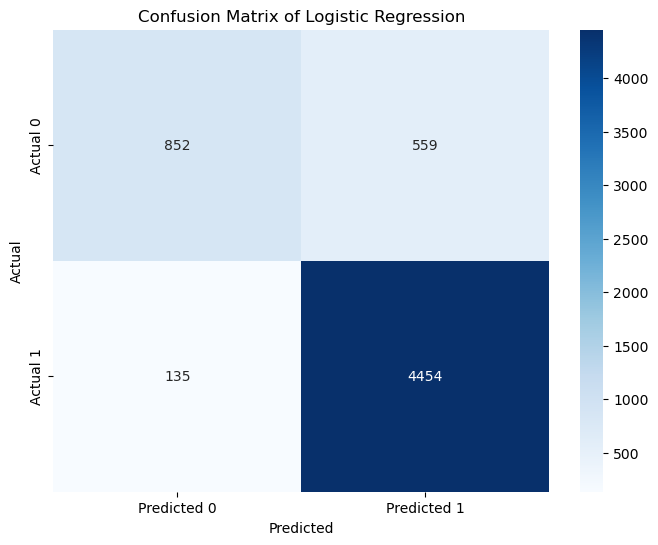

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [24]:
print(classification_report(ytest, lr.predict(xtest)))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71      1411
           1       0.89      0.97      0.93      4589

    accuracy                           0.88      6000
   macro avg       0.88      0.79      0.82      6000
weighted avg       0.88      0.88      0.88      6000



# Random Forest

In [25]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [26]:
rfc_results = evaluate_model(rfc, xtest, ytest)
rfc_results

{'Accuracy': 0.8621666666666666,
 'Confusion Matrix': array([[ 702,  709],
        [ 118, 4471]], dtype=int64)}

In [27]:
cm_rfc = confusion_matrix(ytest, rfc.predict(xtest))
cm_rfc

array([[ 702,  709],
       [ 118, 4471]], dtype=int64)

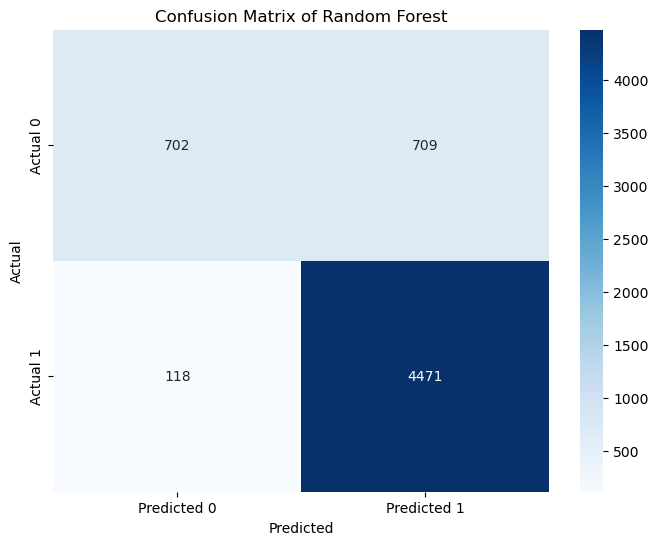

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest')
plt.show()

In [29]:
rfc.score(xtest, ytest)

0.8621666666666666

In [30]:
print(classification_report(ytest, rfc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63      1411
           1       0.86      0.97      0.92      4589

    accuracy                           0.86      6000
   macro avg       0.86      0.74      0.77      6000
weighted avg       0.86      0.86      0.85      6000



# Naive Bayes

In [31]:
mnb = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
mnb.fit(xtrain, ytrain)

MultinomialNB()

In [32]:
mnb_results = evaluate_model(mnb, xtest, ytest)
mnb_results

{'Accuracy': 0.7873333333333333,
 'Confusion Matrix': array([[ 149, 1262],
        [  14, 4575]], dtype=int64)}

In [33]:
cm_mnb = confusion_matrix(ytest, mnb.predict(xtest))
cm_mnb

array([[ 149, 1262],
       [  14, 4575]], dtype=int64)

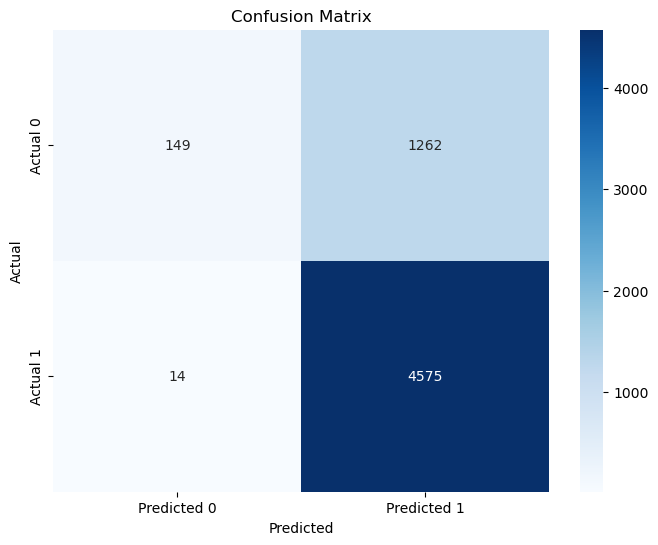

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
print(classification_report(ytest, mnb.predict(xtest)))

              precision    recall  f1-score   support

           0       0.91      0.11      0.19      1411
           1       0.78      1.00      0.88      4589

    accuracy                           0.79      6000
   macro avg       0.85      0.55      0.53      6000
weighted avg       0.81      0.79      0.72      6000



In [36]:
mnb.score(xtest, ytest)

0.7873333333333333

# Hyperparameter Tuning with Random Search (Random Forest)

In [37]:
rfc_params = {
  'n_estimators': [10, 50, 100, 200],
  'max_depth': [3, 5, 7],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'max_features': ['auto', 'sqrt', 'log2'],
  'bootstrap': [True, False],
}

In [38]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_params, n_iter=5, cv=5, random_state=42, n_jobs=-1)
random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42)

In [39]:
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 3, 'bootstrap': True}
Best Accuracy:  0.7602857142857143


# Reasons behind on choosen Hyperparameters

Here's a concise explanation of the chosen hyperparameters and their reasoning for my Sentiment Analysis project:-

i) Number of trees (n_estimators): Exploring different quantities to balance accuracy and complexity. More trees often improve performance but increase training time.

ii) Tree depth (max_depth): Limiting depth to prevent overfitting, as excessively deep trees can memorize noise instead of generalizing well.

iii) Split requirements (min_samples_split, min_samples_leaf): Setting minimum sample thresholds to control tree growth and reduce overfitting. Higher values make trees more conservative in splitting, ensuring patterns are based on sufficient data.

iv) Feature sampling (max_features): Experimenting with strategies to diversify trees and prevent reliance on a few dominant features. This can improve model robustness.

v) Bootstrapping (bootstrap): Evaluating both with and without to assess its impact on accuracy and diversity. Bootstrapping involves sampling data with replacement, potentially reducing model variance but also increasing randomness.

Essentially, I'm carefully tuning these hyperparameters to find the optimal balance between complexity, accuracy, and generalization for your Random Forest model in the context of my NLP project.

# Comparative Analysis

Here highest accuracy gain by using Logistic Regression model. The accuracy is 88%.
Here's a discussion of the strengths and weaknesses of each model in the context of sentiment analysis:-

Linear Regression:

Strengths:
i) Simple and interpretable.
ii) Efficient to train.

Weaknesses:
i) Assumes linear relationships, which might not hold for sentiment.
ii) Sensitive to outliers and noise in text data.

Random Forest Classifier:

Strengths:
i) Handles non-linear relationships and interactions between features.
ii) Robust to outliers and noise.
iii) Can capture complex patterns in text without explicit feature engineering.

Weaknesses:
i) Less interpretable than linear regression, harder to understand feature importance.
ii) Can be computationally expensive to train, especially with large datasets.

Naive Bayes Classifier:

Strengths:
i) Very efficient to train and make predictions.
ii) Handles high-dimensional data like text well.
iii) Performs surprisingly well in many sentiment analysis tasks.

Weaknesses:
i) Assumes strong independence between features, which might not hold in text.
ii) Can be sensitive to the presence of unusual words or features.
iii) Might not capture complex semantic relationships between words.


# Conclusion

In conclusion, The sentiment analysis machine learning project has successfully navigated the intricate landscape of natural language processing to discern and classify sentiments within textual data. Employing advanced algorithms and leveraging a diverse dataset, I have developed a robust model capable of accurately predicting sentiment across a range of contexts.
Through comprehensive evaluation and testing, our sentiment analysis model has demonstrated a high level of accuracy and reliability in discerning sentiment polarity, providing a practical tool for businesses to gauge customer feedback and sentiment on various platforms.
This sentiment analysis project serves as a testament to the growing importance of machine learning applications in deciphering complex human emotions through text, and it paves the way for further innovations in understanding and leveraging sentiment for improved decision-making and user experience in diverse industries.